In [1]:
# dependicies
import tensorflow as tf
import numpy as np
import pandas as p

# keras
from keras.applications import vgg16
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array

# image display
from PIL import Image

Using TensorFlow backend.


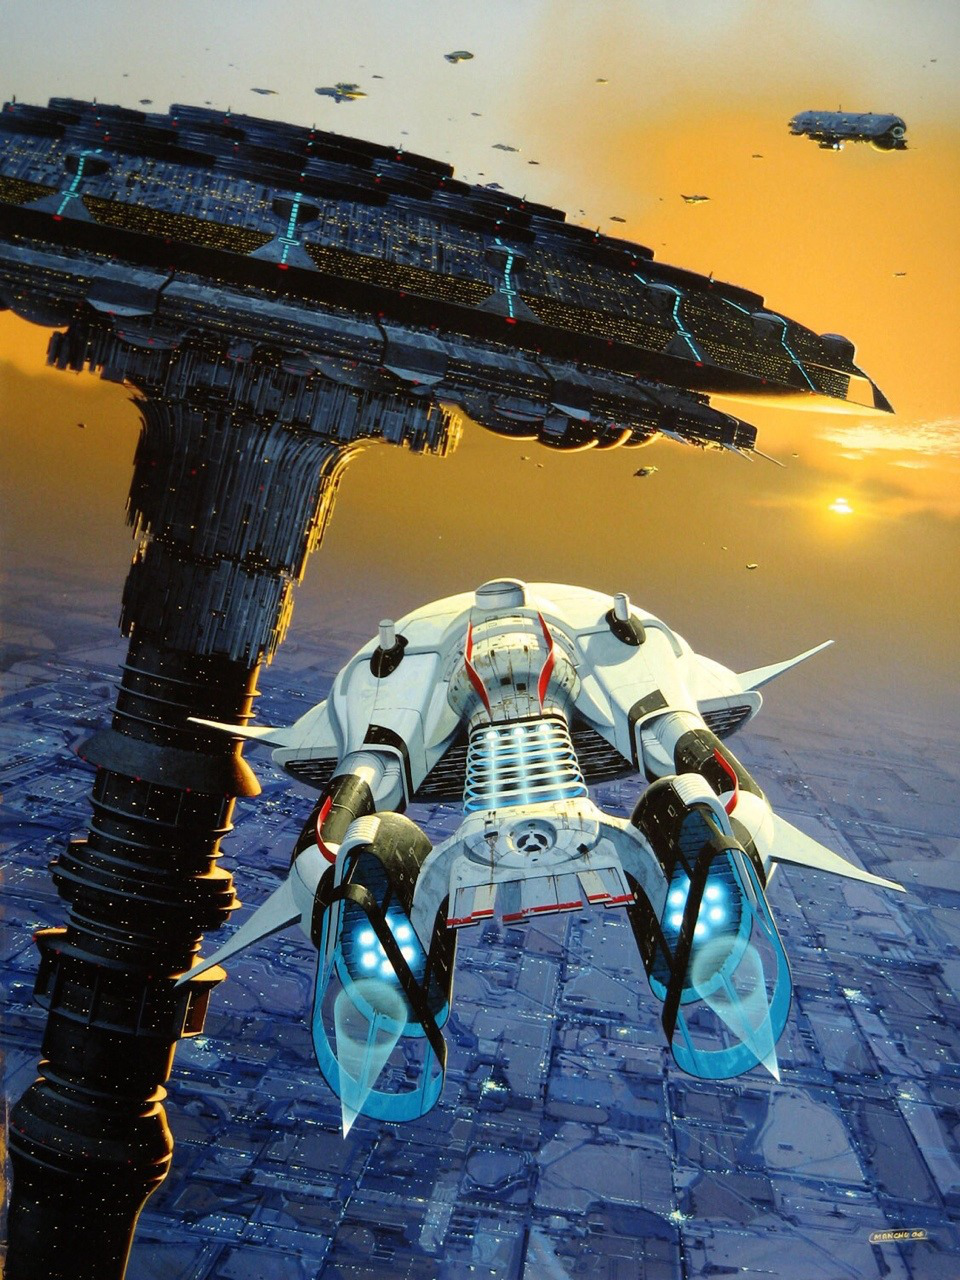

In [2]:
# style image list, base image list
style_image_list = ['./style_images/00001.jpg'] # add other style images later
style_image_list_RESIZED = []

base_image_list = ['base_image.jpg']
base_image_list_RESIZED = []

# set default width / height for ALL images
width = 900
height = 1280

# resize all style images
for i in range(len(style_image_list)):
    temp_image_path = style_image_list[i]
    temp_image = Image.open(temp_image_path)
    temp_image = temp_image.resize((height, width))
    style_image_list_RESIZED.append(temp_image)

# resize all base images
for i in range(len(base_image_list)):
    temp_image_path = base_image_list[i]
    temp_image = Image.open(temp_image_path)
    temp_image = temp_image.resize((height, width))
    base_image_list_RESIZED.append(temp_image)
     
Image.open('./style_images/00001.jpg')

In [3]:
# tensor representations of style images
style_image_list_to_strings = tf.train.string_input_producer(style_image_list_RESIZED)
style_image_tensor_list = []

# tensor representations of base image
base_image_list_to_strings = tf.train.string_input_producer(base_image_list_RESIZED)
base_image_tensor_list = []

TypeError: Expected string, got <PIL.Image.Image image mode=RGB size=1280x900 at 0x11C940110> of type 'Image' instead.

In [6]:
# image reader (style and base)
reader = tf.WholeFileReader()
style_key, style_value = reader.read(style_image_list_to_strings)
base_key, base_value = reader.read(base_image_list_to_strings)

# temporary image placeholder (style and base)
style_temp_img = tf.image.decode_jpeg(style_value)
base_temp_img = tf.image.decode_jpeg(base_value)

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)

    # Start populating the filename queue.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    for i in range(len(style_image_list)): #length of style_image_list
        image = style_temp_img.eval() # tensor of image_list[i].jpg
        style_image_tensor_list.append(image) 
        
    for i in range(len(base_image_list)): #length of base_image_list
        image = base_temp_img.eval() # tensor of image_list[i].jpg
        base_image_tensor_list.append(image) 


    coord.request_stop()
    coord.join(threads)

In [7]:
style_reference_image = K.variable(style_image_tensor_list[0])
base_image = K.variable(base_image_tensor_list[0])
combination_image = K.placeholder((1, width, height, 3))

In [8]:
# combine the 3 images into a single tensor
input_tensor = K.concatenate([base_image, style_reference_image, combination_image], axis=0)

ValueError: Shape must be rank 3 but is rank 4 for 'concat' (op: 'ConcatV2') with input shapes: [851,587,3], [1280,960,3], [1,900,1280,3], [].